In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load data
df = pd.read_csv("student_performance_60.csv")

# Clean attendance (% symbol to float)
df["Attendance_Percentage"] = df["Attendance_Percentage"].astype(float)

# Create Pass/Fail column (threshold: 15)
df["Result"] = df["Final_Exam_Score"].apply(lambda x: "Pass" if x >= 15 else "Fail")

# Features and labels
X = df[["Internal_Assessment_1", "Internal_Assessment_2", "Attendance_Percentage", "Previous_Semester_Grade", "Participation_Score"]]
y = df["Result"]

# Encode label
y = y.map({"Pass": 1, "Fail": 0})

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

           0       0.76      1.00      0.87        13
           1       1.00      0.20      0.33         5

    accuracy                           0.78        18
   macro avg       0.88      0.60      0.60        18
weighted avg       0.83      0.78      0.72        18



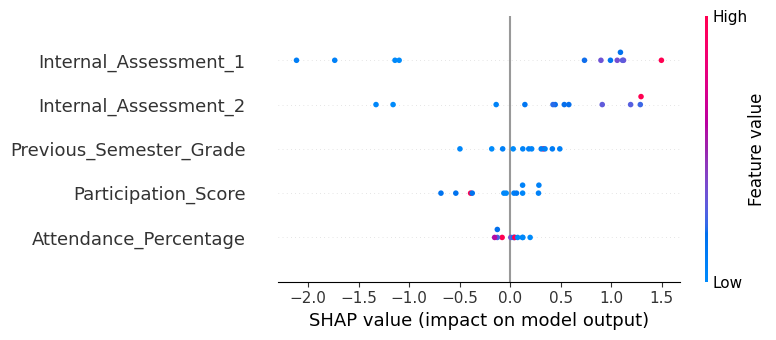

In [43]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt

# Sample Data (Replace this with your dataset)
df = pd.read_csv("student_performance_60.csv")  # or load your DataFrame directly

# Feature and target split
X = df.drop(columns=["Final_Exam_Score", "Student_ID", "Name"])
y = df["Final_Exam_Score"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit pipeline
pipeline = make_pipeline(StandardScaler(), RandomForestRegressor(random_state=42))
pipeline.fit(X_train, y_train)

# SHAP Explainer using the pipeline's prediction function
explainer = shap.Explainer(pipeline.predict, X_train)
shap_values = explainer(X_test)

# Visualize
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [44]:
def generate_tip(row):
    tips = []
    if row["Attendance_Percentage"] < 60:
        tips.append("Improve attendance.")
    if row["Internal_Assessment_1"] < 15:
        tips.append("Focus on Internal 1 topics.")
    if row["Participation_Score"] < 5:
        tips.append("Engage more in class.")
    return " | ".join(tips) if tips else "You're on track!"

df["Recommendation"] = df.apply(generate_tip, axis=1)


In [48]:
import joblib

# Save the pipeline as a .pkl file
joblib.dump(pipeline, 'model_pipeline.pkl')

# To load it later:
# loaded_model = joblib.load('model_pipeline.pkl')


['model_pipeline.pkl']

In [46]:
# Save this as `app.py`

import streamlit as st
import pandas as pd
import joblib

# Load model and data
model = joblib.load("model_pipeline.pkl")  # save model earlier using joblib
df = pd.read_csv("student_performance_60.csv")

st.title("🎓 Student Performance Dashboard")

selected_student = st.selectbox("Select Student", df["Name"])

student_data = df[df["Name"] == selected_student].iloc[0]
features = [[
    student_data["Internal_Assessment_1"],
    student_data["Internal_Assessment_2"],
    student_data["Attendance_Percentage"],
    student_data["Previous_Semester_Grade"],
    student_data["Participation_Score"]
]]

prediction = model.predict(features)[0]
result = "✅ Pass" if prediction == 1 else "❌ Fail"

st.subheader(f"Result: {result}")
st.write(f"📊 Recommendation: {generate_tip(student_data)}")

st.write("📋 Student Details", student_data)


2025-07-27 21:51:22.579 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 21:51:22.584 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 21:51:22.590 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 21:51:22.591 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 21:51:22.599 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 21:51:22.606 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 21:51:22.614 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 21:51:22.615 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [47]:
uploaded_file = st.file_uploader("Upload updated student data CSV")
if uploaded_file is not None:
    df = pd.read_csv(uploaded_file)
    st.success("Data updated successfully!")


2025-07-27 21:51:23.753 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 21:51:23.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 21:51:23.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 21:51:23.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-07-27 21:51:23.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
